<a href="https://colab.research.google.com/github/JeannePul/Building_Makemore_in_Youtube/blob/main/Building_Makemore_1_)_Torch_%26_Language_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My notes to the first video of ["Building Makemore" by Andrej Karpathy](https://www.youtube.com/watch?v=PaCmpygFfXo).

# 1. Introduction

What does Makemore do?

Give Makemore things of one kind and it will create the same kind of thing.

Example: Give Makemore a List of names -> Makemore will generate new names.

Like the NanoGPT2 I will built in the other colab, it is a *character-level language model*.

###1.1 Let´s look at the data

In [ ]:
words = open('names.txt', "r" ).read()
words[:10]

'emma\nolivi'

In [ ]:
words = open('names.txt', "r" ).read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
min_word = min(len(w) for w in words)
max_word = max(len(w) for w in words)
print('We have ', len(words), 'words in out datset. \nThe longest word has', max_word, 'characters, and the shortest has', min_word, 'characters.')

We have  32033 words in out datset. 
The longest word has 15 characters, and the shortest has 2 characters.


#2. A Bigram Language model

-> What characters are likely to follow a specific character

-> We need all the consecutive characters

In [ ]:
for w in words[:1]: # Let's look at the first word of our list
  chs = ['<S>'] + list(w) + ['<E>'] # For our model, it is also very important to know what "Start" & "End-characters" are.
  for ch1, ch2 in zip(chs, chs[1:]): # = zip(w[0:], w[1:])
    print( ch1, ch2)

<S> e
e m
m m
m a
a <E>


*zip(a,b) -> Takes 2 iterators and pairs them up, and creates an iterator of the tuples. If one iterator is shorter, it will just stop.*

###2.1. The statistics of our dataset

What is the easies way to get them? Just count how often any of these combinations accur in our data.

-> We need a Dict

In [ ]:
b = {}
for w in words[:]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

*dict.get(key, alternative_value) returns the value of the key we are looking for. If the key does not exist, it returns the alternative_value*

In [ ]:
sorted(b.items(), key = lambda entry_tuple: -entry_tuple[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

*sorted(iterable, key=key, reverse=reverse) sorts the elements of the iterable. If the elements are tuples, you can decide, what entry of the tuple you want to sort. If you put a "minus" before, it will sort it to be decreasing. Easy example:*


> student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

> sorted(student_tuples, key=lambda student: student[2])   # sort by age

> Output: [('dave', 'B', 10), ('jane', 'B', 12), 'john', 'A', 15)]

### 2.2. Pytorch

In [ ]:
import torch

We want to have a Matrix, that tells us the count of the character-combinations.

In order to do this, we need to know, how big the matrix should be.

Let´s look at the different characters in our dataset.

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)} # our lookup table to connect the characters with numbers
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:

stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

We need a 28x28 matrix: 26 characters and the end and beginning indicators.

In [ ]:
N = torch.zeros((28,28), dtype = torch.int32) # The normal dtype is float, but we only need int

In [ ]:
for w in words[:]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1



### 2.3 Mathplotlib


To visualize our data

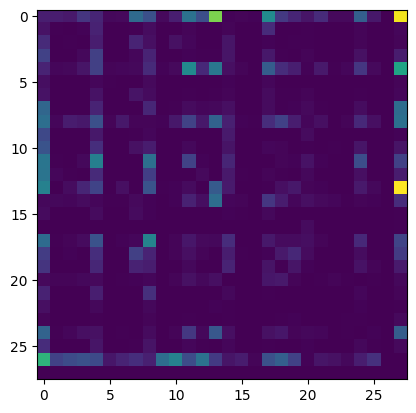

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

Let´s do it even better!

Concerning the following code:

N[i,j].item is important, because N[i,j] will give us a tensor, not the number in the tensor. With .item we get the number

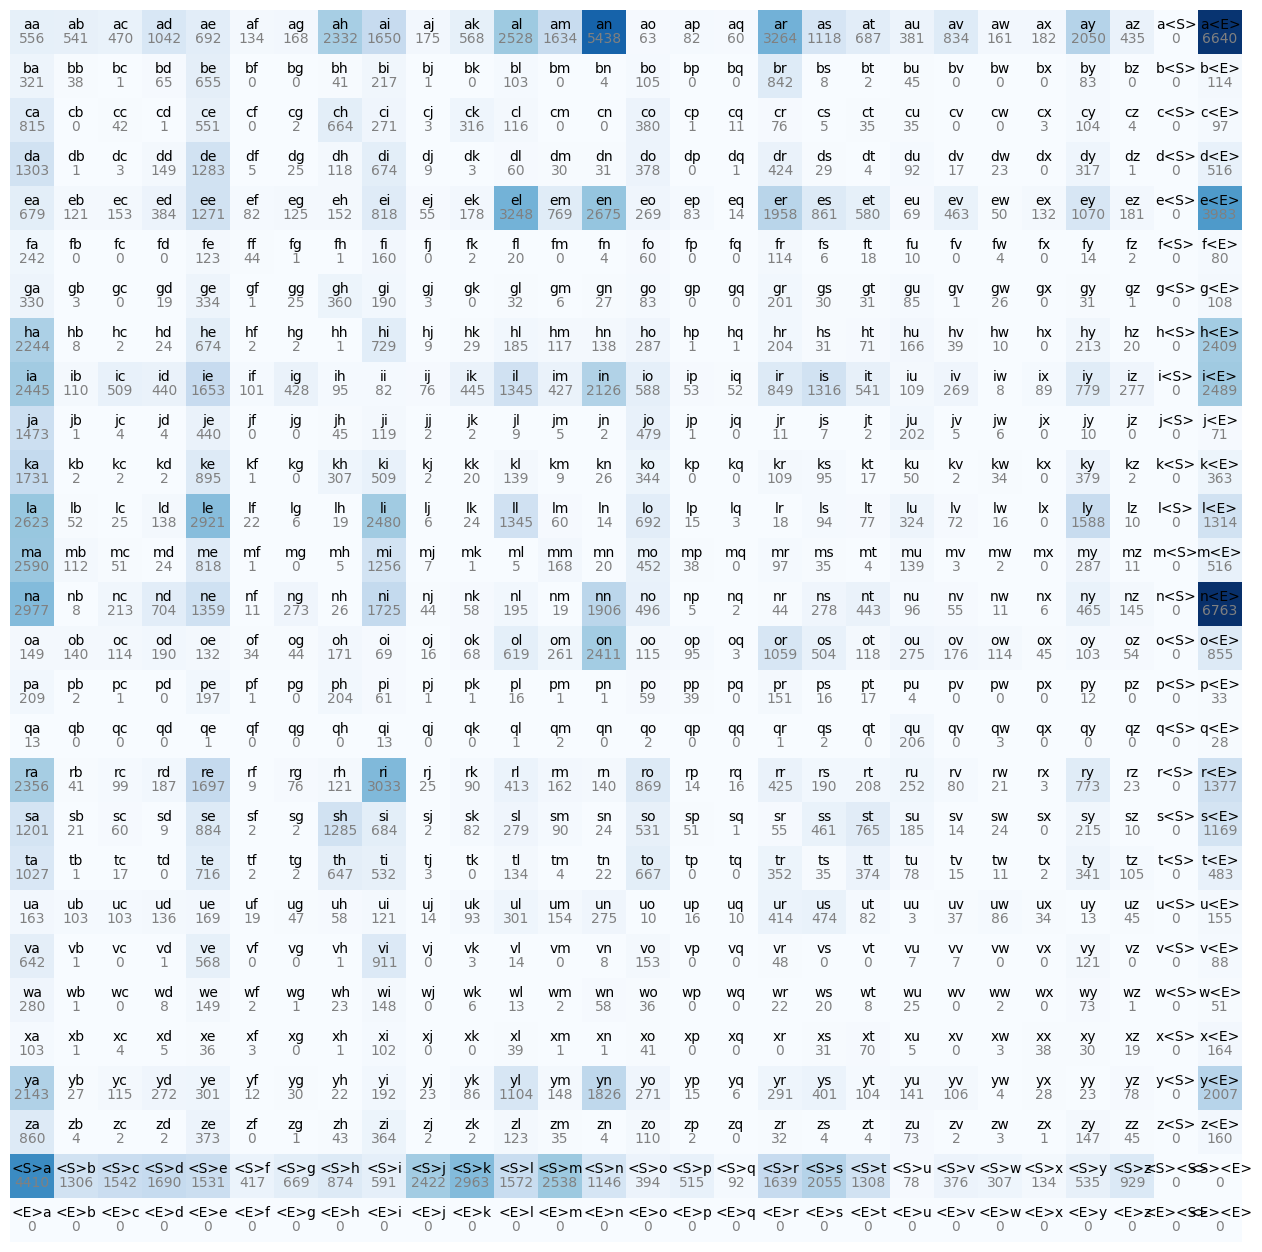

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap= 'Blues')
for i in range(28):
  for j in range(28):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr, ha= 'center', va= 'bottom')
    plt.text(j,i, N[i,j].item(), ha= 'center', va= 'top', color = 'gray')

plt.axis('off');

This is better, but it can still be improved. For example, we have one row and one column, that is zero.

We will now not use '< S >' and '< E >' anymore, but use '.'

In [ ]:
N = torch.zeros((27,27), dtype = torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
for w in words[:]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

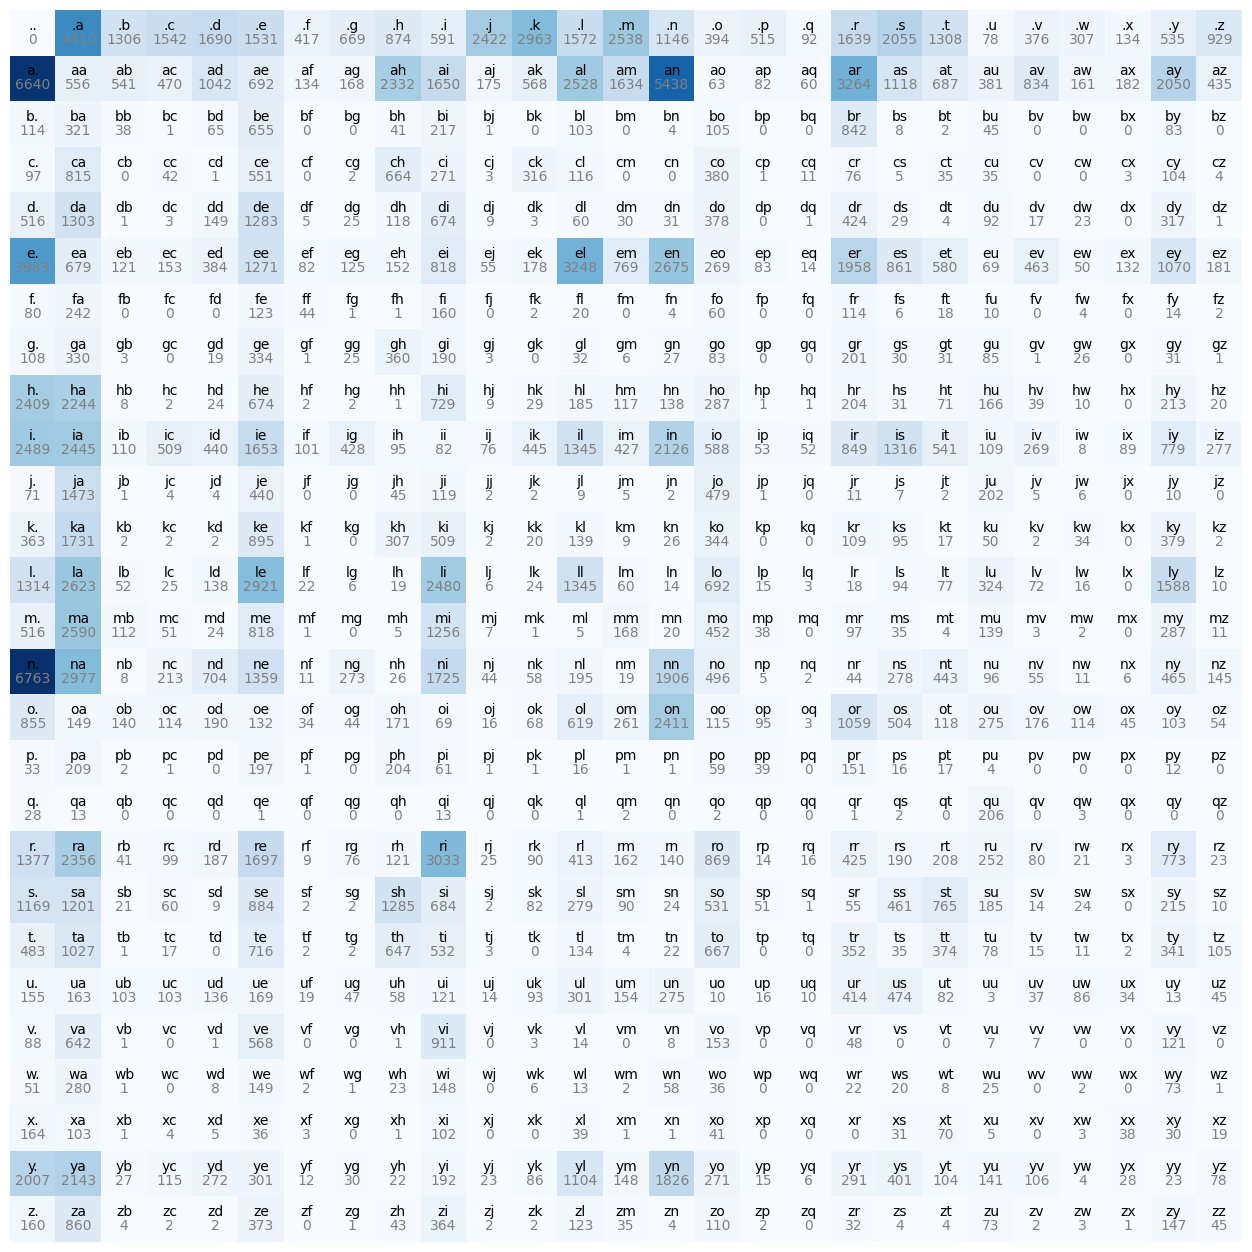

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap= 'Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr, ha= 'center', va= 'bottom')
    plt.text(j,i, N[i,j].item(), ha= 'center', va= 'top', color = 'gray')

plt.axis('off');

### 2.4. The probability

In [ ]:
p = N[0].float() # number of the first letter
p = p/ p.sum() # so we get the probability
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

These numbers are ow the probability of every character being the first one in a name.

Now, we want to sample from this distribution. For this, we will use **torch.multinomial**

*torch.multinomial(input, num_samples, replacement=False, *, generator=None, out=None) -> put in probabilities, returns integers that are sampled according to the probab.*

To make it deterministic, we will use a Generator from pytorch. Just so I get the same results as the example video.

Example of its use:

In [ ]:
g1 = torch.Generator().manual_seed(2147483647) # we seed a random number
p1 = torch.rand(3, generator = g1) #creates 3 random numbers with our generator object
p1 = p1 /p1.sum() # so it is normalised.
p1

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
torch.multinomial(p1, num_samples=100, replacement=True, generator=g1) #replacement=true means, that we can draw 0,1,2 multible times

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

So, what just happened? We generated a tensor p, that says that the probab. for a 0 is 60,64% etc.

Then we asked torch.multinomial to return to us a tensor with 20 entries, filled up by 0,1 or 2 according to the probab defined in p.

End example. In our case:

In [ ]:
p = N[0].float() # number of the first letter
p = p/ p.sum() # so we get the probability
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=13, replacement=True, generator=g)
ix

tensor([13, 19, 14,  1,  1, 20, 20,  1, 13, 13, 13, 11, 23])

Question: He got 13. How can this be? I seeded it!

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  ix= 0
  out = []

  while True:
    p = N[ix].float()
    p = p/p.sum()

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


Why is this so terrible? Well, because our model is super simple and very bad!

Let´s make it at least mor efficient:

Why not have a matrix R with all the probabilities in it already?

In [ ]:
P = N.float()
P /= P.sum(1, keepdim=True) # Inplace operation is faster & does not create new memory
P[8].sum()

tensor(1.0000)

**Read more about: Broadcasting semantics.**

-> Tells you how the dimensions in torch function. Very important!

**Example:** *keepdim= True* gave us a [1x27] vector.

This way the operation P = P/P.sum was [27x27] / [1x27]. **This normalized the rows.**

If we did *keepdim = False*, we would have gotten a [27] tensor. This way, in the P= P/P.sum operation, the [27] tensor would have been expanded->

[27x27] / [27] = [27x27] / [ x27] -> [27x27] / [1x27]

**We would have normalized the columns!**

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  ix= 0
  out = []

  while True:
    p = P[ix]#
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


### 2.5. How good is our model?

In [ ]:
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    print(f'{ch1}{ch2}:{prob:.4f}') # .4f makes the probab smaller

.e:0.0478
em:0.0377
mm:0.0253
ma:0.3899
a.:0.1960
.o:0.0123
ol:0.0780
li:0.1777
iv:0.0152
vi:0.3541
ia:0.1381
a.:0.1960
.a:0.1377
av:0.0246
va:0.2495
a.:0.1960


If you have a very good model, these probabilities should be close to 1.

In a random model they should all be around 0,04. (=the same)

Maximum likeliehood:

Product of all the probabilities. It should be as high as possible.

-> We use the log likelihood.

In [ ]:
log_likelihood = 0.0
n = 0
for w in words[:]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')

print(f'{log_likelihood=}')

log_likelihood=tensor(-559891.7500)


This way, the log_likelihood is 0 if all the probabilities are 1.

Now, to use it as a Loss-function, we need to invert it, so that 0 is the best and more positive is bad.

In [ ]:
nll = -log_likelihood
nll

tensor(559891.7500)

In [ ]:
average_nll= nll/n
average_nll

tensor(2.4541)

**Goal: Maximize the likelihood of the data **

= maximize the log likelihood

= minimize the negative log likelihood

= minimize the average negative log likelihood.

What is now the probability of "andrejq"?

It is infinity! How can this happen?

Well, since our model never saw the ombination "jq", it assignet it to prbability 0.

So if you add infinity to any numbers, it will be infinity. But this is not what we want!

In [ ]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    neg_log_likelihood = - log_likelihood


av_neg_log_likelihood = neg_log_likelihood/n

print(f'{neg_log_likelihood=}')
print(f'{av_neg_log_likelihood=}')

neg_log_likelihood=tensor(inf)
av_neg_log_likelihood=tensor(inf)


What is the easies way to fix this?

We could just add a cound of 1 to each entry in our model, so infinity would not exist anymore!

Or add even more. The more you add, the smoother (uniform) your model will be!

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  ix= 0
  out = []

  while True:
    p = P[ix]#
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break


In [ ]:
log_likelihood = 0.0
n = 0
for w in ['andrejq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    neg_log_likelihood = - log_likelihood
    print(f'{ch1}{ch2}:{prob:.4f}{logprob:.4f}')


av_neg_log_likelihood = neg_log_likelihood/n

print(f'{neg_log_likelihood=}')
print(f'{av_neg_log_likelihood=}')

.a:0.1376-1.9835
an:0.1604-1.8302
nd:0.0384-3.2594
dr:0.0770-2.5646
re:0.1334-2.0143
ej:0.0027-5.9004
jq:0.0003-7.9817
q.:0.0970-2.3331
neg_log_likelihood=tensor(27.8672)
av_neg_log_likelihood=tensor(3.4834)


# 3. A Bigram language model as Neural Network

### 3.1. Create the training set

In [ ]:
xs, ys = [], []



for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs,ys)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1]) tensor([ 5, 13, 13,  1,  0])


-> Auf einen '.' folgt ein 'e' ( 0 -> 5)

-> Auf ein 'e' folgt ein 'm' (5 -> 13)

Wie encoden wir nun die Zahlen? In einem NN multiplizieren wir ja den Input mit den weights, es macht also gar keinen Sinn, einfach die Zahlen einzugeben.

-> One-hot Encoding

= Wir stellen die Inputs als Vektoren dar. Der 13te Spot ist dann der Indikator (mit 1 statt 0 gefüllt), dass es sich um den 13ten Buchstaben handelt.

So smart!

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [ ]:
xenc.shape

torch.Size([5, 27])

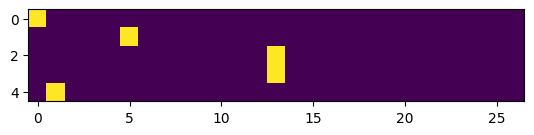

In [ ]:
plt.imshow(xenc)

Careful now!

Always double check your type.

In [ ]:
xenc.dtype

torch.int64

But can we work with integers in a NN?

NO! We need floats!

In [ ]:
xenc = xenc.float()

In [ ]:
xenc.dtype

torch.float32

### 3.2. Inizialisation

In [ ]:
W = torch.randn((27,1))
xenc @ W

tensor([[ 1.7732],
        [-0.3764],
        [ 0.1088],
        [ 0.1088],
        [-0.9849]])

Why is this now 5x1 ? We did:

(5 x 27) * (27 * 1 ) = (5 * 1)

This code now will evaluate all 27 inputs at the same time.

In [ ]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.1681,  0.8787,  0.1646,  2.5787,  1.6301,  0.0188, -0.1056,  0.8898,
         -1.3395, -0.6156, -1.0473,  0.8928,  0.1094, -1.0587,  3.0160,  0.7988,
         -0.3793,  0.1870, -0.0060,  0.7081, -0.4543, -0.3411,  0.9872, -0.3288,
         -0.4103,  0.0413, -0.3912],
        [-2.2789, -0.2827, -0.6003, -0.2440, -0.9126,  0.0152, -0.1848, -1.3047,
         -0.7555, -0.0411,  1.3571, -1.8115, -0.4355, -1.4285, -0.1985, -0.7865,
          0.3591,  1.7440,  0.5146, -0.3632,  0.5374, -1.3521, -0.4954, -1.7086,
          0.4531, -0.2335,  0.6339],
        [-2.3663, -1.8573,  0.9196,  0.4631,  1.1365,  0.5650, -0.0142, -1.1440,
          0.7338,  0.3824,  0.6546,  4.1023,  1.0429,  0.3267, -0.2232,  0.9363,
          0.2067,  0.3673,  1.0249, -2.7243,  0.1279,  0.2597,  0.6669,  1.3470,
          2.1527, -0.1798,  0.8165],
        [-2.3663, -1.8573,  0.9196,  0.4631,  1.1365,  0.5650, -0.0142, -1.1440,
          0.7338,  0.3824,  0.6546,  4.1023,  1.0429,  0.3267, -0.2232,  0.9363

### 3.3. Output

We want the output to be some kind of a probability distribution. For this to work, we want to transform out hidden layer outputs into digits between 0 and 1.

We can do this with softmax!

$Softmax = \frac{\mathrm{e}^{z_i}}{\sum_{j=1}^K\mathrm{e}^{z_i}}$

In [ ]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims=True) # = softmax
probs

tensor([[0.0127, 0.0360, 0.0176, 0.1973, 0.0764, 0.0153, 0.0135, 0.0364, 0.0039,
         0.0081, 0.0053, 0.0366, 0.0167, 0.0052, 0.3055, 0.0333, 0.0102, 0.0180,
         0.0149, 0.0304, 0.0095, 0.0106, 0.0402, 0.0108, 0.0099, 0.0156, 0.0101],
        [0.0035, 0.0261, 0.0190, 0.0271, 0.0139, 0.0352, 0.0288, 0.0094, 0.0163,
         0.0332, 0.1345, 0.0057, 0.0224, 0.0083, 0.0284, 0.0158, 0.0496, 0.1981,
         0.0579, 0.0241, 0.0593, 0.0090, 0.0211, 0.0063, 0.0545, 0.0274, 0.0653],
        [0.0009, 0.0014, 0.0229, 0.0145, 0.0285, 0.0161, 0.0090, 0.0029, 0.0190,
         0.0134, 0.0176, 0.5523, 0.0259, 0.0127, 0.0073, 0.0233, 0.0112, 0.0132,
         0.0254, 0.0006, 0.0104, 0.0118, 0.0178, 0.0351, 0.0786, 0.0076, 0.0207],
        [0.0009, 0.0014, 0.0229, 0.0145, 0.0285, 0.0161, 0.0090, 0.0029, 0.0190,
         0.0134, 0.0176, 0.5523, 0.0259, 0.0127, 0.0073, 0.0233, 0.0112, 0.0132,
         0.0254, 0.0006, 0.0104, 0.0118, 0.0178, 0.0351, 0.0786, 0.0076, 0.0207],
        [0.0032, 0.0042,

probs[0] would now be the probability for any character to come directly after '.'

(since we encoded '.' as '0')

### 3.4. Summary of code until now

In [ ]:
xs

tensor([ 0,  5, 13, 13,  1])

In [ ]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

# Forward pass

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

probs.shape

torch.Size([5, 27])

Important: Everything we did until now is differentiable. This is essential for our backward pass!

In [ ]:
nlls = torch.zeros(5) # emma provides us with 5 examples
for i in range(2):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})', '\n')
  print('input to the neural net:', x, '\n')
  print('output probabilities from the neural net:', probs[i], '\n')
  print('label (actual next character):', y, '\n')
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item(), '\n')
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item(), '\n')
  nlls[i] = nll

print('=========', '\n')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())



--------
bigram example 1: .e (indexes 0,5) 

input to the neural net: 0 

output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]) 

label (actual next character): 5 

probability assigned by the net to the the correct character: 0.01228625513613224 

log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488 

--------
bigram example 2: em (indexes 5,13) 

input to the neural net: 5 

output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472]) 

label (actual next character): 13 

probability assigned by the net to the the c

What does this mean?

It means, that our model thinks that the actual order of characters is very unlikely.

But this just means, that our current W is very bad. How could it be otherwise? We didn´t train it yet.

If our W was good, our model would see the actual order as very probable.

### 3.5. Backpropagation & Optimization

I will write down the code from the beginning again, so it is easier to follow.

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # requires_grad=True bc we need the gradient later!

**Forward pass:**

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

loss_forward = -probs[torch.arange(5), ys].log().mean() # we use neg log likelihood for our loss

print(f'The loss is: {loss_forward} ')

The loss is: 3.7693049907684326 


What does the last row do? It gives us the prob. of the actual character coming behind the characters of 'Emma'.

In [ ]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

Here you can see the more "intuitive" way of writing the code. But our way is way prettier!

In [ ]:
print(probs[torch.arange(5), ys])

print(probs[0, ys[0]], probs[1, ys[1]], probs[2, ys[2]], probs[3, ys[3]], probs[4, ys[4]])

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)
tensor(0.0123, grad_fn=<SelectBackward0>) tensor(0.0181, grad_fn=<SelectBackward0>) tensor(0.0267, grad_fn=<SelectBackward0>) tensor(0.0737, grad_fn=<SelectBackward0>) tensor(0.0150, grad_fn=<SelectBackward0>)


In [ ]:
probs[torch.arange(5), ys].log()

tensor([-4.3993, -4.0146, -3.6234, -2.6081, -4.2012], grad_fn=<LogBackward0>)

In [ ]:
probs[torch.arange(5), ys].log().mean()

tensor(-3.7693, grad_fn=<MeanBackward0>)

**Backward pass**

1st: All Gradients should be reset -> They should be 0.

In [ ]:
W.grad = None # Setting gradients to 0, but more efficient
loss_forward.backward()


In [ ]:
W.grad # 27x27

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

Every entry of W.grad tells us now the influence of that weight on the loss function

**Update W**

In [ ]:
W.data += -0.1 * W.grad

The loss should now be less

In [ ]:
logits = xenc @ W # We use the updated W now
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

loss_updated =  -probs[torch.arange(5), ys].log().mean()

print(f'loss_forward = {loss_forward}, loss_updated = {loss_updated}')

loss_forward = 3.7693049907684326, loss_updated = 3.7492127418518066


The loss is smaller now!

So we just need to do this over and over again with different words to train our model.

### 3.6. Training our NN

In [ ]:
# create the entire dataset
xs, ys = [], []
for w in words[:]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
for k in range(56):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  print(counts.shape)
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print('Iteration:', k+1, '   Loss:' , loss.item())


  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()


  # update
  W.data += -50 * W.grad



torch.Size([228146, 27])
Iteration: 1    Loss: 3.7686190605163574
torch.Size([228146, 27])
Iteration: 2    Loss: 3.3788065910339355
torch.Size([228146, 27])
Iteration: 3    Loss: 3.16109037399292
torch.Size([228146, 27])
Iteration: 4    Loss: 3.0271859169006348
torch.Size([228146, 27])
Iteration: 5    Loss: 2.9344842433929443
torch.Size([228146, 27])
Iteration: 6    Loss: 2.867231607437134
torch.Size([228146, 27])
Iteration: 7    Loss: 2.8166542053222656
torch.Size([228146, 27])
Iteration: 8    Loss: 2.777146339416504
torch.Size([228146, 27])
Iteration: 9    Loss: 2.7452542781829834
torch.Size([228146, 27])
Iteration: 10    Loss: 2.7188303470611572
torch.Size([228146, 27])
Iteration: 11    Loss: 2.696505546569824
torch.Size([228146, 27])
Iteration: 12    Loss: 2.6773719787597656
torch.Size([228146, 27])
Iteration: 13    Loss: 2.6608052253723145
torch.Size([228146, 27])
Iteration: 14    Loss: 2.6463515758514404
torch.Size([228146, 27])
Iteration: 15    Loss: 2.633664846420288
torch.Size

# 4. Sample our NN

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pxzfay.
a.
nn.
kohin.
tolian.
jgee.
ksaheiauyanilevias.
dbdainrwieta.


# 5. Conclusion

We see now, that the loss of our NN is very similar to the loss of our counting-based method.

But the NN is still better. It allows us to amplify the NN and improve it.